# Name :- Varun Biren Majithia

# Student ID :- 8894799

## Importing the necessary packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn import svm

## Loading the iris data

In [2]:
iris = load_iris(as_frame=True,return_X_y=False)

## Splitting the independent and dependent variable 

In [3]:
X = iris.data
y = iris.target

In [4]:
X.shape

(150, 4)

In [5]:
y.shape

(150,)

In [6]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

## Correlation Analysis

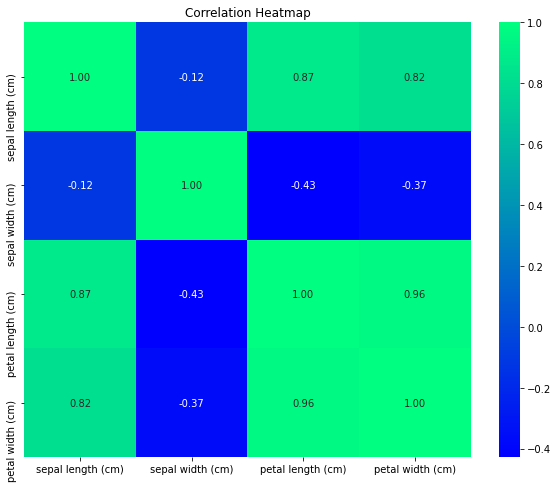

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='winter', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Dropping columns sepal lenght and sepal width

In [9]:
df = X.drop(['sepal length (cm)','sepal width (cm)'],axis=1)

In [10]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Performing Data Preprocessing using Min-Max Scaler 

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

df = pd.DataFrame(sc.fit_transform(df))

In [12]:
df.columns = ['petal_length (cm)','petal_width (cm)']

In [13]:
df.head()

,petal_length (cm),petal_width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


## Within Cluster Sum of Squares

Cluster 10 Inertia 0.376855004991825


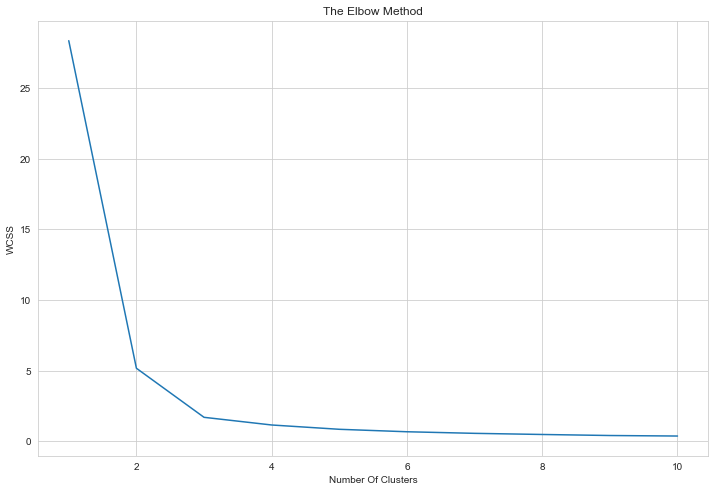

In [16]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
from sklearn.cluster import KMeans
wcss = [] ## within cluster sum of squares 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init = 'k-means++',random_state=42)##init is called as a constructor in object oriented terminology
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)## inertia here is used to get the value of wcss as it is the attribute of kMeans
    ## inertia will calculate the formula of wcss i.e summation(ci+xi)^2 i.e distance between the centroids + number of points^2
    ##WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.
print("Cluster", i, 'Inertia', kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

#### In the elbow plot above we can see the we have obtained the optimal value of K = 3 as there is a significant drop at K = 3.

## Fitting the Kmeans model with optimal value of K = 3

In [17]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter =300, n_init = 10, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [18]:
y_kmeans = kmeans.fit_predict(df)

In [19]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Clustering Visualization

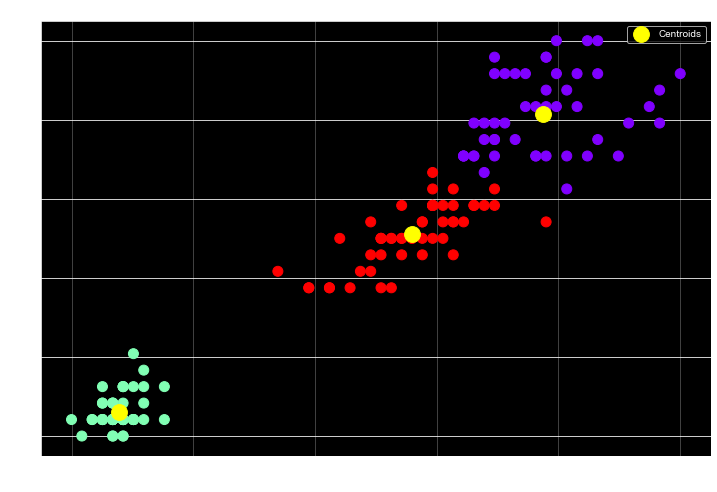

In [20]:
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')
plt.grid(True, axis='x', color='gray', linewidth=0.5)
# Getting the cluster labels 
cluster_labels = kmeans.labels_


# Getting the centers
cluster_centers = kmeans.cluster_centers_

# Plotting the data points as well as cluster centers
plt.scatter(df['petal_length (cm)'], df['petal_width (cm)'], c=cluster_labels, cmap='rainbow', s=100)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', s=250, label='Centroids')
plt.xlabel('Petal Length cm')
plt.ylabel('Petal Width cm')
plt.title('K-Means Clustering with optimal value of clusters as 3')
plt.legend()
plt.show()

# Part 2

## Importing the data to jupyter notebook

In [3]:
df1 = pd.read_csv("C://Users//Admin//Downloads//heart.csv")
df1.head(n=5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Checking info of the data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Checkinf 5 Summary Statistics

In [5]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df1.shape

(918, 12)

## Checking for null values 

In [7]:
df1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Removing Outliers Using Z score with a threshold of 3

In [8]:
import pandas as pd
from scipy import stats

# Get only the numeric columns from the DataFrame
numeric_columns = df1.select_dtypes(include='number')

# Calculate Z-scores for each numeric column
z_scores = stats.zscore(numeric_columns)

# Find rows with Z-score greater than 3 or less than -3 (in absolute value)
outlier_rows = (abs(z_scores) > 3).any(axis=1) | (abs(z_scores) < -3).any(axis=1)

# Remove outlier rows from the DataFrame in place
df1 = df1[~outlier_rows]

In [13]:
df1.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,0.789766,0.785317,132.027809,198.005562,0.232481,0.991101,136.917686,0.403782,0.861513,1.373749,0.547275
std,9.456073,0.407701,0.956496,17.120895,107.157779,0.422649,0.629569,25.356740,0.490928,1.007626,0.601057,0.498037
min,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,63.000000,0.000000,-2.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,174.500000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,222.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,266.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,185.000000,518.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,1.000000


## Converting Categorical String Columns to Numeric Using Label Encoder  

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Sex'] = encoder.fit_transform(df1["Sex"])
df1["ChestPainType"] = encoder.fit_transform(df1["ChestPainType"])
df1["RestingECG"] = encoder.fit_transform(df1["RestingECG"])
df1["ExerciseAngina"] = encoder.fit_transform(df1["ExerciseAngina"])
df1["ST_Slope"] = encoder.fit_transform(df1["ST_Slope"])

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

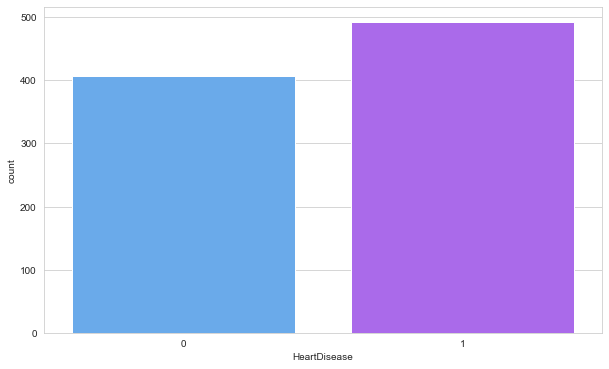

In [82]:
sns.set_style("whitegrid")
sns.countplot(x = "HeartDisease",data = df1,palette='cool')

In [12]:
df1['HeartDisease'].value_counts()

1    492
0    407
Name: HeartDisease, dtype: int64

## Correlation Analysis

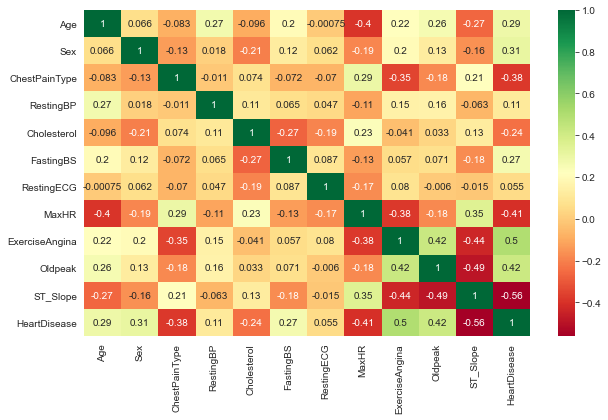

In [14]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [10,6]
sns.heatmap(df1[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')
plt.show()

In [15]:
df1[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']].corr()['HeartDisease']

Age               0.286672
Sex               0.309505
ChestPainType    -0.381915
RestingBP         0.110266
Cholesterol      -0.239056
FastingBS         0.267794
RestingECG        0.054617
MaxHR            -0.406112
ExerciseAngina    0.497990
Oldpeak           0.419697
ST_Slope         -0.561294
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

##  My Inferences on the above confusion Matrix

##### From the above confusion matrix we can observe that RestingECG has the highest correlation with the target feature HeartDisease followed by ExerciseAngina, Oldpeak, Sex , Age , FastingBS, RestingBP

## Splitting the data into Independent and dependent variable

In [17]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [18]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [19]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

## Data Preprocessing Using Standard Scaler

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## Performing train test split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

## Fitting SVM model on the dataset

In [26]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

## Making predictions on the unseen data

In [27]:
y_predsvm = model_svm.predict(X_test)

In [28]:
y_predsvm

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

## Performing Cross Validation  

In [30]:
from sklearn.model_selection import cross_val_score
scores_svm = cross_val_score(model_svm, X_train, y_train, cv=10, scoring='accuracy')
scores_svm

array([0.77777778, 0.86111111, 0.90277778, 0.90277778, 0.875     ,
       0.80555556, 0.875     , 0.77777778, 0.91666667, 0.78873239])

In [31]:
print("The average cross validation accuracy of svm model is",scores_svm.mean())

The average cross validation accuracy of svm model is 0.8483176838810642


Confusion Matrix:


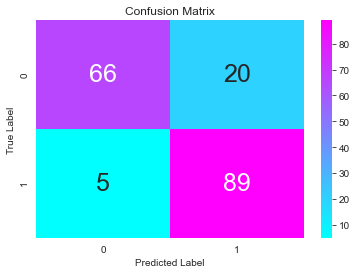

In [57]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_svm = confusion_matrix(y_test, y_predsvm)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_svm, annot=True ,cmap = "cool" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [70]:
cf_svm

array([[66, 20],
       [ 5, 89]], dtype=int64)

## Classification Report SVM (Precision, Recall, Accuracy, F1 Score)

In [44]:
precision_svm = precision_score(y_test, y_predsvm)
recall_svm = recall_score(y_test, y_predsvm)
f1_score_svm = f1_score(y_test, y_predsvm)
accuracy_svm = accuracy_score(y_test,y_predsvm)

print('Accuracy:', accuracy_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1 Score:', f1_score_svm)

Accuracy: 0.8611111111111112
Precision: 0.8165137614678899
Recall: 0.9468085106382979
F1 Score: 0.8768472906403939


## Fitting Logistic Regression Model 

In [45]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred_logistic = logistic_model.predict(X_test)

In [47]:
y_pred_logistic

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

## Performing cross Validation on the logistic regression model

In [48]:
from sklearn.model_selection import cross_val_score
scores_logistic = cross_val_score(logistic_model, X_train, y_train, cv=10, scoring='accuracy')
scores_logistic

array([0.76388889, 0.86111111, 0.91666667, 0.91666667, 0.875     ,
       0.79166667, 0.90277778, 0.79166667, 0.91666667, 0.8028169 ])

In [112]:
print("The mean accuracy of logistic reg model is",scores_logistic.mean())

The mean accuracy of logistic reg model is 0.8538928012519561


Confusion Matrix:


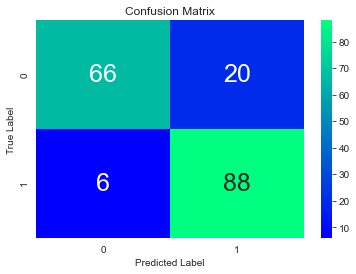

In [59]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_logistic = confusion_matrix(y_test, y_pred_logistic)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_logistic, annot=True ,cmap = "winter" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [71]:
cf_logistic

array([[66, 20],
       [ 6, 88]], dtype=int64)

In [60]:
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic  = f1_score(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test,y_pred_logistic)

print('Accuracy:', accuracy_logistic)
print('Precision:', precision_logistic)
print('Recall:', recall_logistic)
print('F1 Score:', f1_logistic)

Accuracy: 0.8555555555555555
Precision: 0.8148148148148148
Recall: 0.9361702127659575
F1 Score: 0.8712871287128713


## Fitting Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1], dtype=int64)

In [66]:
from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='accuracy')
scores_rf

array([0.79166667, 0.86111111, 0.93055556, 0.91666667, 0.875     ,
       0.80555556, 0.84722222, 0.77777778, 0.90277778, 0.83098592])

Confusion Matrix:


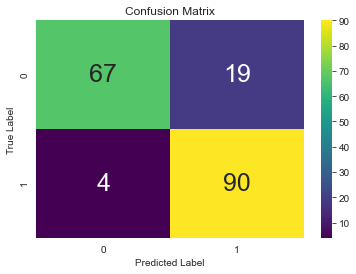

In [68]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_rf = confusion_matrix(y_test, y_pred_rf)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_rf, annot=True ,cmap = "viridis" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [69]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf  = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test,y_pred_rf)

print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)

Accuracy: 0.8722222222222222
Precision: 0.8256880733944955
Recall: 0.9574468085106383
F1 Score: 0.8866995073891627


# Summary of evaluation metrics for each model before PCA

# SVM

<b>Accuracy:</b> 0.86111111
Explanation: The accuracy of the SVM model is approximately 0.8611 (or 86.11%). This means that the model correctly predicts the target class for about 86.11%

<b>Precision:</b> 0.8165137614678899
Explanation: The precision of the SVM model is approximately 0.8165 (or 81.65%). This indicates that when the model predicts a positive (diseased) instance, it is correct about 81.65% of the time.

<b>Recall:</b>
Recall: 0.9468085106382979
Explanation: The recall of the SVM model is approximately 0.9468 (or 94.68%). This means that the model is able to correctly identify about 94.68% of the actual positive (diseased) instances in the dataset. 

<b>F1 Score:</b>
F1 Score: 0.8768472906403939

<b>Explanation:</b> The F1 score is approximately 0.8768 (or 87.68%). The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.The SVM model is balanced in properly predicting positive cases and avoiding false positives and false negatives, according to the F1 score of 87.68%.

<b>the confusion matrix for the SVM model is as follows:</b>
True Positive (TP): 66 instances are correctly predicted as positive.
False Positive (FP): 20 instances are falsely predicted as positive.
True Negative (TN): 89 instances are correctly predicted as negative.
False Negative (FN): 5 instances are falsely predicted as negative.

# Logistic Regression

<b>Average Cross-Validation Accuracy:</b> Approximately 0.8544 (or 85.44%).

<b>Accuracy:</b> 0.855 (or 85.56%). The model correctly predicts about 85.56% of instances in the test set.

<b>Precision:</b> 0.8148148148148148 (or 81.48%). When the model predicts a positive case, it is correct around 81.48% of the time.

<b>Recall:</b> 0.9361702127659575 (or 93.62%). The model is able to correctly identify about 93.62% of the actual positive instances in the dataset.

<b>F1 Score:</b> 0.8712871287128713 (or 87.13%). The F1 score is a balanced measure that considers both precision and recall.

In conclusion, the logistic regression model shows good results in categorizing cases of heart disease. It accurately detects 85.56% of positive instances (disease cases) while with a high recall of 93.62%  With an accuracy of 81.48%, the model is generally accurate when it predicts a positive case. The F1 score of 87.13% demonstrates an evenly distributed performance in terms of recall and precision.

# Random Forest

Average Cross-Validation Accuracy: Approximately 0.8549 (or 85.49%).

<b>Accuracy:</b> 0.87222 (or 87.22%). The model correctly predicts about 87.22% of instances in the test set.

<b>Precision:</b> 0.8256880733944955 (or 82.57%). When the model predicts a positive case, it is correct around 82.57% of the time.

<b>Recall:</b> 0.9574468085106383 (or 95.74%). The model is able to correctly identify about 95.74% of the actual positive instances in the dataset.

<b>F1 Score:</b> 0.8866995073891627 (or 88.67%). The F1 score is a balanced measure that considers both precision and recall.

In conclusion, the random forest model performs a good job of categorizing cases of heart disease.  The model's 82.57% precision indicates that, when it predicts a positive case, it typically gets it correctly. The model is able to properly identify an important proportion of actual positive classes, which can be interpreted with the high recall of 95.74%.

# Applying Principal Component Analysis

In [73]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

## Number of PC Components needed to cover 95% Variance

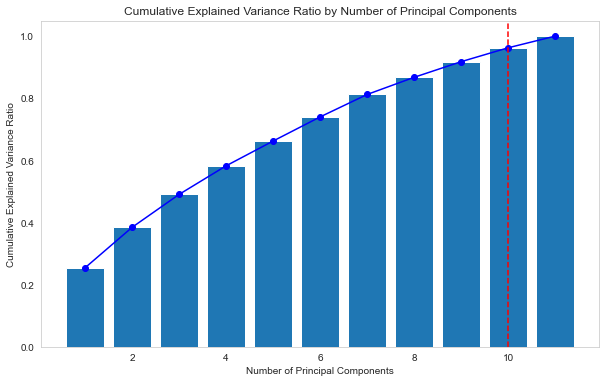

In [88]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Find the number of componentsm that cover 90% of variance
threshold_var = 0.95
num_components_to_retain = np.argmax(cumulative_var >= threshold_var) + 1


# Visualize the explained variance ratio for each principal component
plt.bar(range(1, len(cumulative_var) + 1), cumulative_var)
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', color='b')
plt.axvline(x=num_components_to_retain, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid()
plt.show()

#### From the above plot we can see that we need 10 Principal Components to retain 95% of variance

## Contribution of each Principal Component

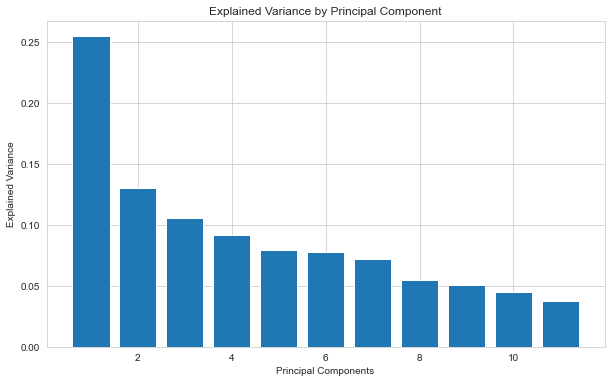

In [89]:
plt.figure(figsize=(10, 6))
explained_var = pca.explained_variance_ratio_
number_of_components = len(explained_var)

plt.bar(range(1, number_of_components + 1), explained_var)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()

## Applying PCA on the scaled data with n_components = 10

In [91]:
pca = PCA(n_components=num_components_to_retain)
X_pca = pca.fit_transform(X_scaled)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [93]:
pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(num_components_to_retain)])

In [94]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.260394,-0.196017,-0.315994,-0.473200,-1.380116,-0.042161,-0.720194,-0.044691,-0.053387,0.302054
1,-1.109802,-1.084683,1.494787,-0.247159,0.450455,1.364743,0.287679,-1.605967,-0.276943,0.853561
2,-1.087917,1.036894,-0.615630,-2.023368,-0.647999,-0.039667,0.388549,0.886641,-0.928754,0.913196
3,1.001422,-1.195743,-0.623414,-1.067789,1.661355,0.416247,-0.143105,-0.947327,-0.775901,-0.001257
4,-1.022416,0.321124,1.302148,-0.605039,-1.002041,-0.798221,0.887925,-0.158102,-0.394602,0.216712
...,...,...,...,...,...,...,...,...,...,...
894,-1.149727,-0.038444,-0.456479,1.047102,-0.601535,1.118055,1.909169,0.879365,-0.772013,0.613187
895,2.107299,-0.317096,1.250514,1.265070,-0.191531,0.735528,-1.127808,0.647931,1.947544,0.496436
896,1.701101,0.019119,-0.867957,-0.315922,0.066428,-0.519533,0.461841,-0.403853,-0.047164,-0.274550
897,-1.727297,-1.338502,0.471090,1.013752,1.535879,-0.170826,-0.106719,-0.736963,0.114573,0.447635


# Fitting SVM model after PCA 

In [97]:
model_svm_pca = svm.SVC(kernel='linear')
model_svm_pca.fit(X_train, y_train)

SVC(kernel='linear')

In [99]:
y_pred_svm_pca = model_svm_pca.predict(X_test)
y_pred_svm_pca

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

# Performing cross Validation after PCA on SVM

In [101]:
from sklearn.model_selection import cross_val_score
scores_svm_pca = cross_val_score(model_svm_pca, X_train, y_train, cv=10, scoring='accuracy')
scores_svm_pca

array([0.77777778, 0.84722222, 0.90277778, 0.875     , 0.875     ,
       0.80555556, 0.88888889, 0.76388889, 0.91666667, 0.78873239])

In [102]:
print("The average accuracy of SVM after pca is",scores_svm_pca.mean())

The average accuracy of SVM after pca is 0.8441510172143974


## Confusion Matrix SVM after PCA

Confusion Matrix:


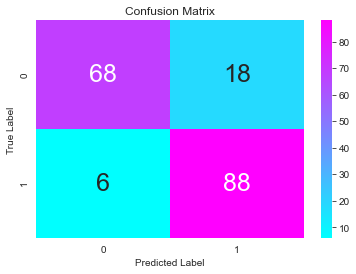

In [103]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_svm_pca = confusion_matrix(y_test, y_pred_svm_pca)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_svm_pca, annot=True ,cmap = "cool" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report SVM after PCA

In [106]:
precision_svm_pca = precision_score(y_test, y_pred_svm_pca)
recall_svm_pca = recall_score(y_test, y_pred_svm_pca)
f1_score_svm_pca = f1_score(y_test, y_pred_svm_pca)
accuracy_svm_pca = accuracy_score(y_test,y_pred_svm_pca)

print('Accuracy:', accuracy_svm_pca)
print('Precision:', precision_svm_pca)
print('Recall:', recall_svm_pca)
print('F1 Score:', f1_score_svm_pca)

Accuracy: 0.8666666666666667
Precision: 0.8301886792452831
Recall: 0.9361702127659575
F1 Score: 0.88


# Fitting Logistic Regression After PCA

In [107]:
logistic_model_pca = LogisticRegression()
logistic_model_pca.fit(X_train,y_train)

LogisticRegression()

In [109]:
y_pred_logistic_pca = logistic_model_pca.predict(X_test)
y_pred_logistic_pca

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

## Performing Cross Validation on Logistic Regession Model after PCA

In [110]:
from sklearn.model_selection import cross_val_score
scores_logistic_pca = cross_val_score(logistic_model_pca, X_train, y_train, cv=10, scoring='accuracy')
scores_logistic_pca

array([0.75      , 0.83333333, 0.90277778, 0.875     , 0.86111111,
       0.79166667, 0.90277778, 0.79166667, 0.91666667, 0.8028169 ])

In [111]:
print("The mean accuracy of Logistic Regression Model after PCA is",scores_logistic_pca.mean())

The mean accuracy of Logistic Regression Model after PCA is 0.8427816901408451


## Confusion Matrix of Logistic Regression Model after PCA

Confusion Matrix:


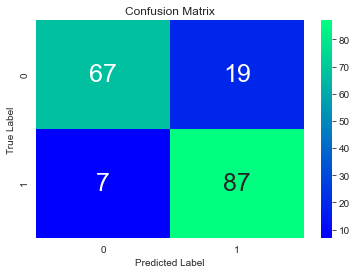

In [113]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_logistic_pca = confusion_matrix(y_test, y_pred_logistic_pca)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_logistic_pca, annot=True ,cmap = "winter" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report of Logistic Regression Model after PCA

In [114]:
precision_logistic_pca = precision_score(y_test, y_pred_logistic_pca)
recall_logistic_pca = recall_score(y_test, y_pred_logistic_pca)
f1_logistic_pca  = f1_score(y_test, y_pred_logistic_pca)
accuracy_logistic_pca = accuracy_score(y_test,y_pred_logistic_pca)

print('Accuracy:', accuracy_logistic_pca)
print('Precision:', precision_logistic_pca)
print('Recall:', recall_logistic_pca)
print('F1 Score:', f1_logistic_pca)

Accuracy: 0.8555555555555555
Precision: 0.8207547169811321
Recall: 0.925531914893617
F1 Score: 0.8700000000000001


# Fitting Random Forest After PCA


In [115]:
rf_classifier_pca = RandomForestClassifier(random_state=42)
rf_classifier_pca.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [117]:
y_pred_rf_pca = rf_classifier_pca.predict(X_test)
y_pred_rf_pca

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1], dtype=int64)

## Performing Cross Validation on Random Forest Model after PCA

In [118]:
from sklearn.model_selection import cross_val_score
scores_rf_pca = cross_val_score(rf_classifier_pca, X_train, y_train, cv=10, scoring='accuracy')
scores_rf_pca

array([0.81944444, 0.86111111, 0.93055556, 0.86111111, 0.84722222,
       0.81944444, 0.86111111, 0.75      , 0.91666667, 0.83098592])

In [119]:
print("The mean accuracy of Random Forest After PCA is",scores_rf_pca.mean())

The mean accuracy of Random Forest After PCA is 0.8497652582159624


## Confusion Matrix after PCA 

Confusion Matrix:


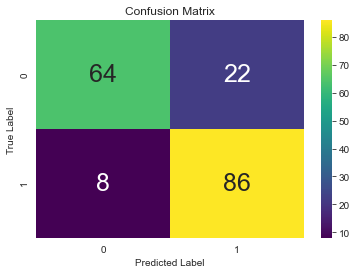

In [122]:
 from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_rf_pca, annot=True ,cmap = "viridis" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report of Random Forest after PCA

In [121]:
precision_rf_pca = precision_score(y_test, y_pred_rf_pca)
recall_rf_pca = recall_score(y_test, y_pred_rf_pca)
f1_rf_pca  = f1_score(y_test, y_pred_rf_pca)
accuracy_rf_pca = accuracy_score(y_test,y_pred_rf_pca)

print('Accuracy:', accuracy_rf_pca)
print('Precision:', precision_rf_pca)
print('Recall:', recall_rf_pca)
print('F1 Score:', f1_rf_pca)

Accuracy: 0.8333333333333334
Precision: 0.7962962962962963
Recall: 0.9148936170212766
F1 Score: 0.8514851485148516


# Comparing SVM Before and After PCA

Comparison - Impact of PCA:

PCA reduced the number of features from the original dataset and retained 10 principal components, which cover 95% of the variance in the data. This reduction in dimensionality can help in simplifying the model and reducing the risk of overfitting.

The SVM model after PCA achieved a slightly lower average cross-validation accuracy (84.31%) compared to the SVM model without PCA (84.83%). However, the difference is relatively small.

Interestingly, the SVM model after PCA showed improved precision (83.02%) compared to the SVM model without PCA (81.65%). This means the model is more accurate in correctly classifying positive cases.

The recall for the SVM model after PCA (93.62%) is slightly lower than that of the SVM model without PCA (94.68%). While it correctly identifies fewer positive instances, the difference is not significant.

The F1 score for the SVM model after PCA (88.00%) is slightly higher than that of the SVM model without PCA (87.68%). This indicates a balanced performance, considering both precision and recall.

Conclusion:

With less dimensionality, the SVM model after PCA performs similarly to the SVM model without PCA. It accomplishes a comparable accuracy, a little higher precision, and an F1 score.
The SVM model after PCA exhibits improved accuracy, which is crucial when predicting positive cases, even though the SVM model without PCA performs marginally better in terms of recall.


# Comparing Logsitic Regression Before and After PCA

PCA slightly improved precision (82.08% after PCA vs. 81.48% before PCA), indicating better accuracy in classifying positive cases.

There was a minor decrease in recall (92.55% after PCA vs. 93.62% before PCA), suggesting a small reduction in correctly identifying actual positive instances.

F1 Score also decreased slightly (87.00% after PCA vs. 87.13% before PCA) due to the balanced effect of precision and recall changes.

Overall, the effects of PCA on the Logistic Regression model were minimal, with a similar level of accuracy and a balanced performance in terms of precision and recall.

The cross-validation scores for both models were close and consistent, showing that PCA did not significantly affect the model's generalization performance.

The Logistic Regression model continued to perform similarly after PCA. PCA showed a small improvement in precision, pointing to enhanced accuracy in categorizing positive classes. The overall impact of PCA on the model was minimal, withstanding a little reduction in recall and F1 score.

# Comparing Random Forest Classifier Before and After PCA

After applying PCA, the Random Forest model's average cross-validation accuracy decreased slightly from 85.28% to 84.22%.

Precision decreased from 82.57% to 79.63%, indicating a reduction in correctly classifying positive cases.

Recall decreased from 95.74% to 91.49%, suggesting a decrease in correctly identifying actual positive instances.

F1 Score decreased from 88.67% to 85.15% due to the balanced effect of precision and recall changes.

The confusion matrices for both cases show some changes in true positives, true negatives, false positives, and false negatives.

Even though PCA keeps the majority of the crucial data from the original features, it nevertheless ignores some volatility. The model's capacity to distinguish between classes may be hampered by this information loss, changing accuracy, precision, recall, and F1 score.